# Exploratory Data Analysis
## Load and Preview Data

In this section, we load the transactional dataset from the Microsoft Fabric Lakehouse (Silver Layer) using the `.parquet` format. The dataset contains key features used for fraud detection such as transaction details, customer demographics, login behavior, and account activity.


In [4]:
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/Tables/Silver/bank_transactions_data/part-00000-5ee6fa47-1fec-453c-af80-50954400a764-c000.snappy.parquet"
df = pd.read_parquet("/lakehouse/default/Tables/Silver/bank_transactions_data/part-00000-5ee6fa47-1fec-453c-af80-50954400a764-c000.snappy.parquet")
display(df)


### Data Preview

The dataset includes the following columns:

- `TransactionID`, `AccountID`, `DeviceID`, `IP_Address`, `MerchantID`: Unique identifiers.
- `TransactionAmount`, `TransactionDate`, `TransactionDuration`: Key transaction metrics.
- `TransactionType`, `Location`, `Channel`: Transaction context.
- `CustomerAge`, `CustomerOccupation`, `AccountBalance`, `LoginAttempts`: Customer behavior & profile.
- `PreviousTransactionDate`: For time-based analysis.

This raw view gives a holistic picture of the kind of events being captured for anomaly detection.


In [19]:
! pip install seaborn

## Exploratory Data Analysis

### Univariate Analysis: Numerical Features

#### 1. Numeric variables

We perform exploratory data analysis (EDA) on the numeric features to understand their distribution, central tendency, and potential outliers. This helps identify anomalous behavior, which is critical for fraud detection.

We'll examine the following features:
- `TransactionAmount`
- `TransactionDuration`
- `CustomerAge`
- `LoginAttempts`
- `AccountBalance`

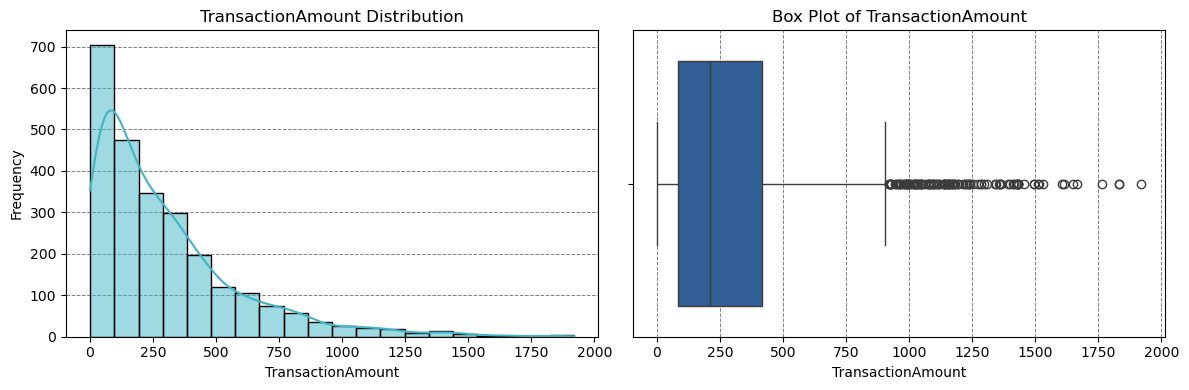


 Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


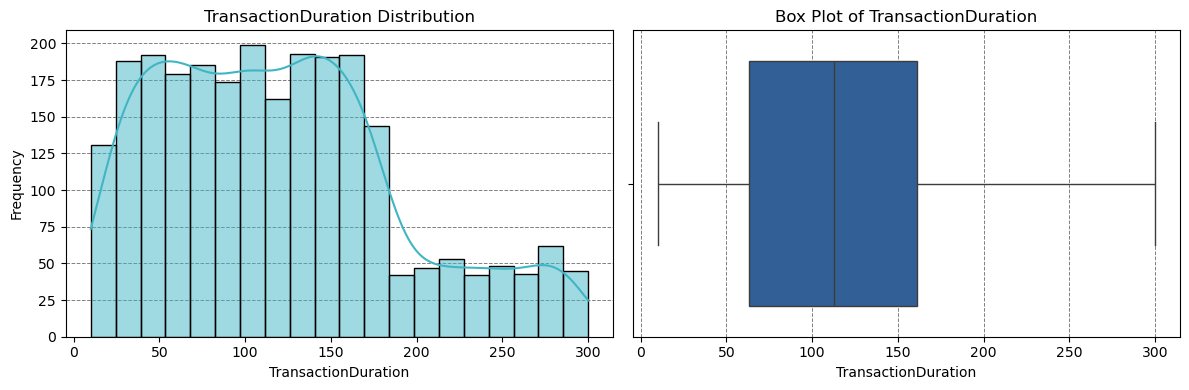


 Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


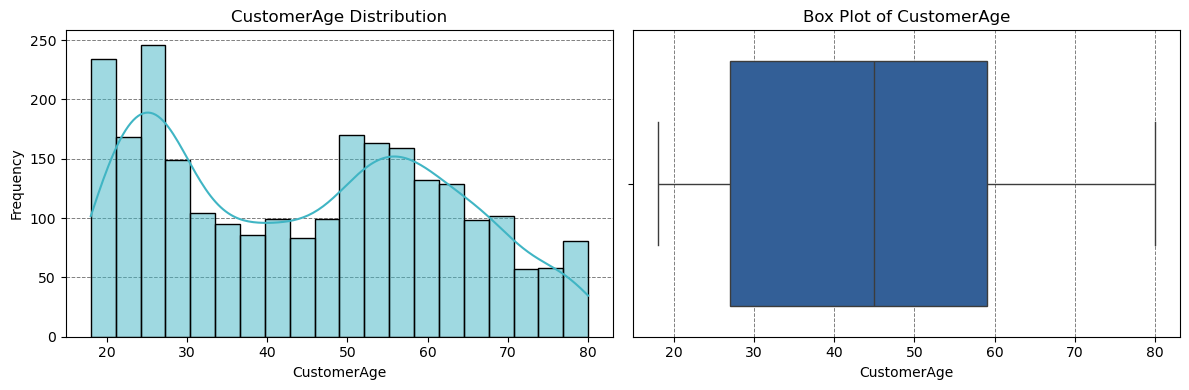


 Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


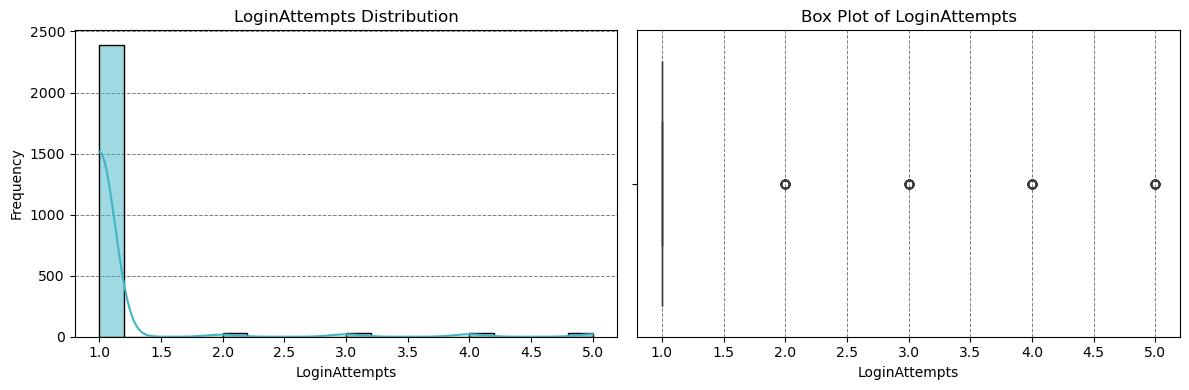


 Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


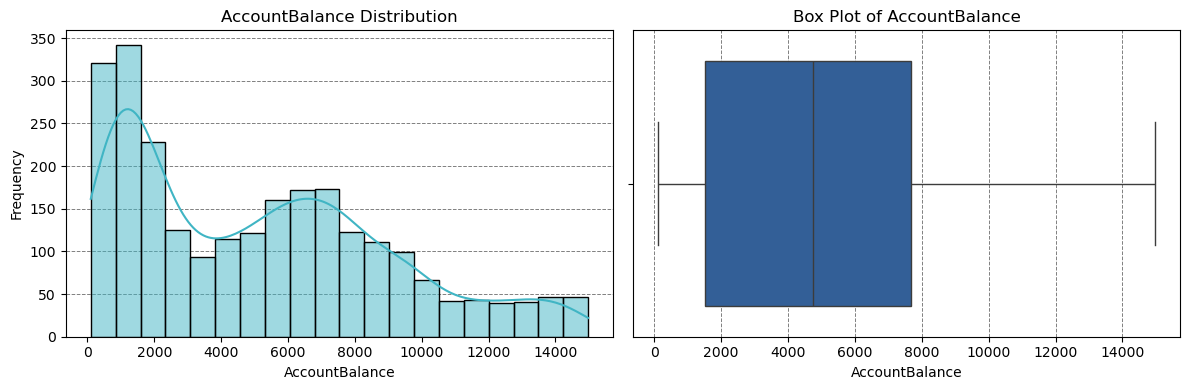


 Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_columns(df, columns, palette="YlGnBu"):   
    # Define a color palette
    custom_palette = sns.color_palette(palette, 3)

    for col in columns:
        if col in df.columns:  # Checking if column exists
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            # Histogram with KDE
            sns.histplot(df[col], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
            axes[0].set_title(f'{col} Distribution')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')
            axes[0].set_axisbelow(True)
            axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

            # Box Plot
            sns.boxplot(x=df[col], color=custom_palette[2], ax=axes[1])
            axes[1].set_title(f'Box Plot of {col}')
            axes[1].set_xlabel(col)
            axes[1].set_axisbelow(True)
            axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

            plt.tight_layout()
            plt.show()

            # Print summary statistics
            print(f'\n Summary Statistics for {col}:\n', df[col].describe())
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
#Plotting the numeric columns
numeric_columns = ["TransactionAmount", "TransactionDuration", "CustomerAge", "LoginAttempts", "AccountBalance"]  
plot_numerical_columns(df, numeric_columns, palette="YlGnBu")  

##### Summary Statistics & Visual Insights

This section merges statistical summaries with visual analysis (histograms and box plots) of key numerical features. These insights guide our understanding of user behavior and flag potential fraud patterns.

---

##### Transaction Amount
- **Mean:** 297.6 | **Max:** 1919.1 | **Min:** 0.26  
- **Distribution:** Right-skewed — most transactions are small.  
- **Visual Insight:** The histogram reveals a concentration of low-value transactions. The box plot highlights several outliers.  
- **Insight:** A few high-value transactions may be suspicious and should be reviewed for potential fraud.

---

##### Transaction Duration
- **Mean:** 119.6 seconds | **Range:** 10 – 300  
- **Distribution:** Nearly symmetrical.  
- **Visual Insight:** Histogram and box plot show a consistent spread with no extreme outliers.  
- **Insight:** Most users complete transactions within a moderate and expected timeframe.

---

##### Customer Age
- **Mean:** 44.7 | **Range:** 18 – 80  
- **Distribution:** Evenly spread with a peak in the mid-40s.  
- **Visual Insight:** Histogram indicates a balanced age distribution; box plot confirms absence of outliers.  
- **Insight:** The customer base is diverse and well-distributed across age groups.

---

##### Login Attempts
- **Mean:** 1.12 | **Range:** 1 – 5  
- **Distribution:** Heavily skewed toward 1.  
- **Visual Insight:** Most users log in successfully on the first attempt; few outliers suggest up to 5 attempts.  
- **Insight:** Multiple login attempts could indicate suspicious login behavior, such as brute-force attacks.

---

##### Account Balance
- **Mean:** 5,114 | **Max:** 14,978 | **Min:** 101  
- **Distribution:** Right-skewed.  
- **Visual Insight:** Most accounts have moderate balances; a few outliers represent high-value accounts.  
- **Insight:** High-balance accounts are rare and may be prime targets for fraud.

---

## 2. Categorical Variable Analysis

This section visualizes the distribution of key categorical features in the dataset using bar charts and pie charts. The function `plot_categorical_columns()` takes a list of categorical columns and generates:

- A count plot (bar chart) showing the frequency of each category.
- A pie chart showing the percentage share of each category.

This visual analysis helps uncover patterns in customer behavior and transaction preferences that might relate to fraud risks.




/tmp/ipykernel_48/3087966143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


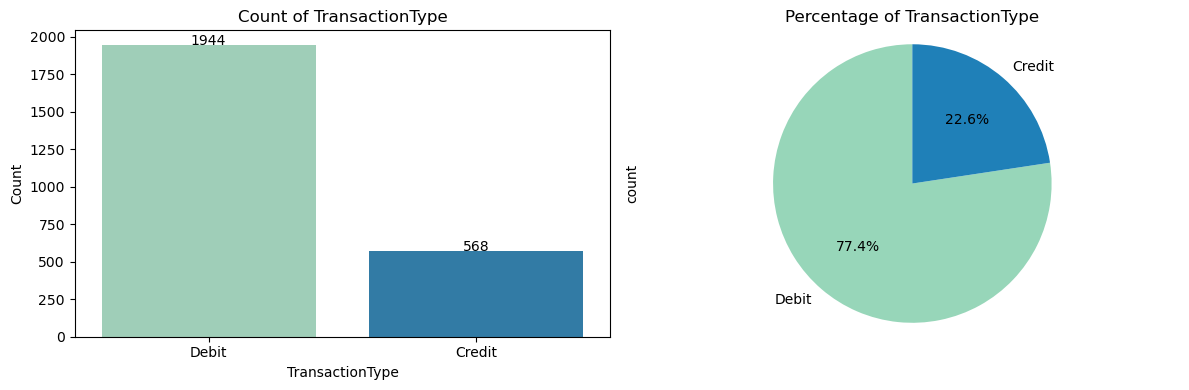

/tmp/ipykernel_48/3087966143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


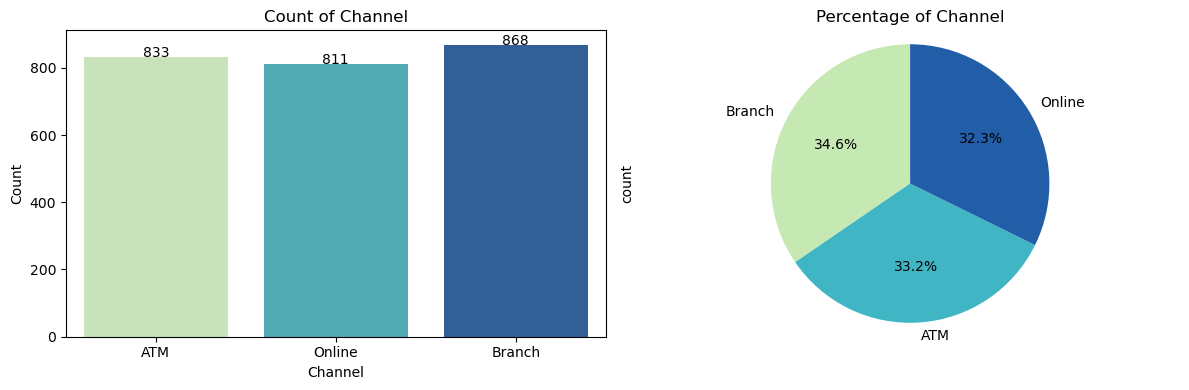

/tmp/ipykernel_48/3087966143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


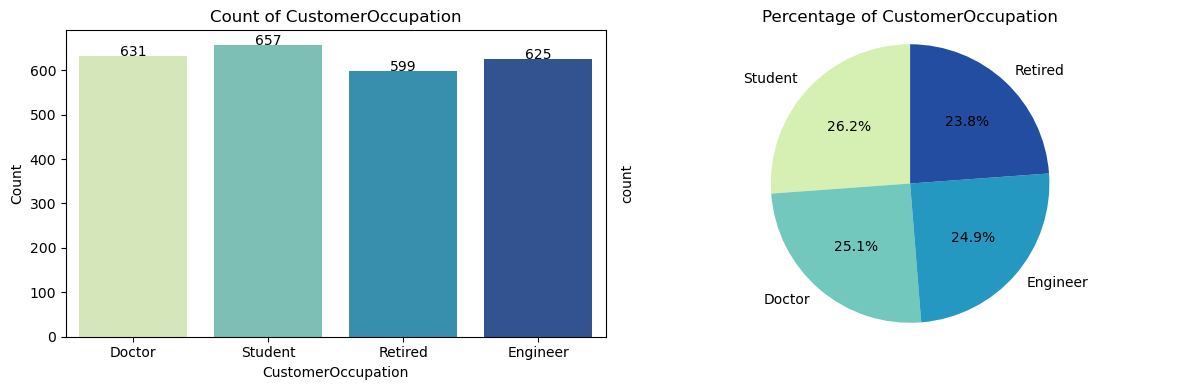

In [21]:
def plot_categorical_columns(df, categorical_columns, palette="YlGnBu"):
    
    for feature in categorical_columns:
        if feature in df.columns: 
            num_categories = df[feature].nunique()
            custom_palette = sns.color_palette(palette, num_categories)

            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            # Count Plot
            sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
            axes[0].set_title(f'Count of {feature}')
            axes[0].set_xlabel(feature)
            axes[0].set_ylabel('Count')

            # Annotate count values on bars
            for p in axes[0].patches:
                axes[0].annotate(f'{int(p.get_height())}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='baseline')

            # Pie Chart
            df[feature].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=custom_palette, startangle=90)
            axes[1].set_title(f'Percentage of {feature}')
            axes[1].axis('equal') 

            plt.tight_layout()
            plt.show()
        else:
            print(f" Warning: Column '{feature}' not found in DataFrame.")

categorical_columns = ["TransactionType","Channel", "CustomerOccupation"]  # Add more categorical columns
plot_categorical_columns(df, categorical_columns, palette="YlGnBu")


### Insights from Categorical Data

- **Transaction Type:**  
  The bar chart indicates that **Debit** transactions are significantly more common than **Credit** transactions, making up about 77.4% of all transactions. This suggests a dominant customer preference for debit usage in the dataset.

- **Transaction Channel:**  
  Transactions are distributed across **ATM**, **Online**, and **Branch** channels. While all three channels are well represented, **Branch** transactions are the most frequent, followed closely by **ATM**, with **Online** being used the least. This pattern may reflect customer trust in physical locations.

- **Customer Occupation:**  
  The data shows a fairly balanced representation of customers across occupations including **Doctor**, **Student**, **Retired**, and **Engineer**. **Students** and **Doctors** have slightly higher transaction counts, which might be tied to age demographics or financial activity patterns.


---



## 3. Bivariate analysis



#### A. High-Value Transactions by Channel

This section investigates how high-value transactions are distributed across different transaction channels (Online, ATM, Branch). 

We define high-value transactions as those in the **top 5%** based on the `TransactionAmount` column. This threshold is calculated using the 95th percentile. 

The filtered dataset (`high_value_transactions`) provides insight into the characteristics of these large transactions, such as customer age, occupation, transaction duration, and channel usage.

This analysis helps identify if certain channels are more prone to high-value (and potentially risky) transactions.


In [22]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

Number of high-value transactions (top 5%): 126


#### Insights on High-Value Transactions

- **Count:** A total of **126 transactions** fall in the top 5% by value, considered high-value.
- **Channel Distribution:** High-value transactions are observed across all three channels — **Branch**, **ATM**, and **Online** — with a relatively balanced distribution, suggesting no single channel is overly dominant for large transactions.
- **Customer Behavior:** These transactions involve customers from a variety of age groups and occupations, including **Students**, **Retired individuals**, **Engineers**, and **Doctors**.
- **Risk Insight:** Channels like **Online** and **ATM** handle large transactions without in-person verification, which may carry a higher fraud risk compared to in-branch interactions.

#### B. Distribution of High-Value Transactions by Channel

This visualization examines how high-value transactions (top 5%) are distributed across different transaction channels — **Branch, ATM, and Online**.

We use a histogram with `TransactionAmount` on the x-axis and the **frequency** of transactions on the y-axis. The transactions are color-coded based on their channel, allowing us to compare their distributions.

Additionally, a KDE (Kernel Density Estimate) curve is overlaid to highlight the overall trends for each channel.


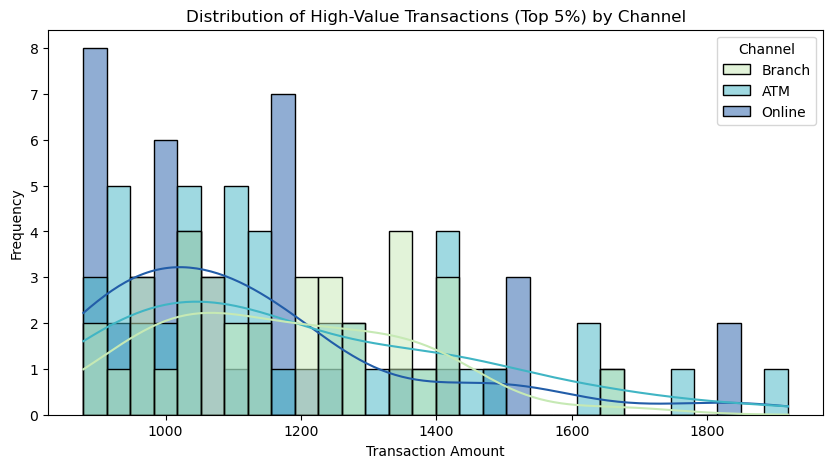

In [23]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='YlGnBu')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency') 
plt.show()

### Insights from the Distribution Plot

- **Transaction Amounts:** The high-value transactions span a broad range, starting from **900+** and reaching nearly **1900**.
- **Channel Comparison:**
  - **Online transactions** (dark blue) appear more frequent at higher amounts, suggesting that larger transactions are more common online.
  - **ATM transactions** (medium blue) have a wider spread, indicating a mix of moderate and high-value transactions.
  - **Branch transactions** (light green) also exhibit high-value transactions but tend to cluster around specific amounts.
- **Potential Fraud Risk:** The presence of **high-value online transactions** could indicate a need for additional monitoring, as online channels typically have higher fraud risks compared to in-person transactions.

This visualization helps in identifying **channel-specific patterns in high-value transactions**, which can guide further fraud detection efforts.

#### C. Distribution of High-Value Transactions by Customer Occupation

This visualization examines how **high-value transactions (top 5%)** are distributed across different **customer occupations**.

We use a histogram where:
- The **x-axis** represents the transaction amounts.
- The **y-axis** represents the frequency of transactions.
- Each occupation is color-coded to compare how different professions handle high-value transactions.
- A **KDE (Kernel Density Estimate) curve** is overlaid to show overall trends for each occupation.

This analysis helps identify whether certain occupations are more prone to conducting high-value transactions.

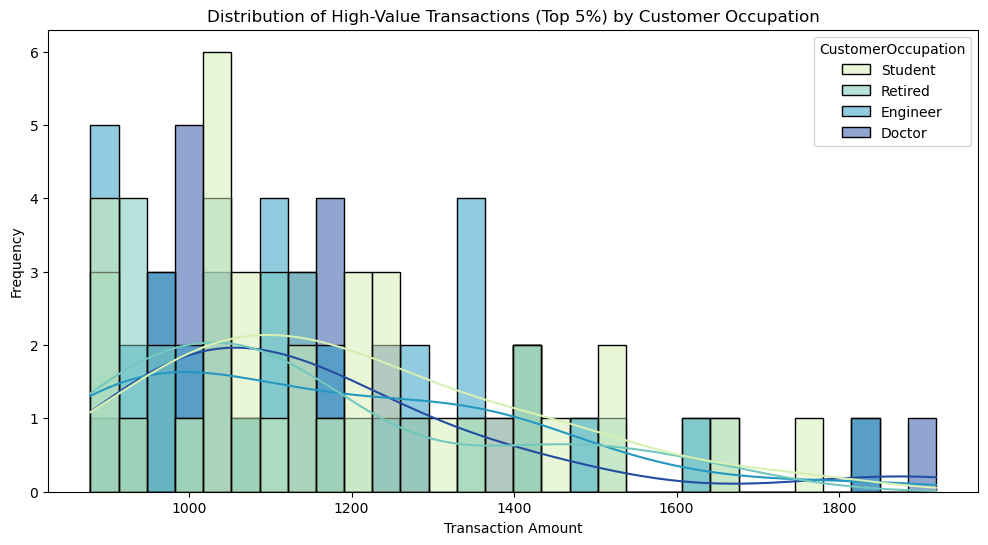

In [24]:
# Plotting high-value transactions with 'CustomerOccupation' as hue
plt.figure(figsize=(12, 6))  
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='CustomerOccupation', palette='YlGnBu')
plt.title('Distribution of High-Value Transactions (Top 5%) by Customer Occupation')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')  
plt.show()

### Interpretation of Output

- **Transaction Spread**: High-value transactions are spread across various amounts, mostly ranging between **900 and 1800**.
- **Occupation Trends**:
  - **Students and Engineers** have frequent high-value transactions in the **lower range (900-1200)**.
  - **Doctors and Retirees** tend to have higher-value transactions, extending beyond **1600**.
- **Density Patterns**:
  - **Doctors** and **Engineers** exhibit **smoother KDE curves**, suggesting a **gradual spread** of transaction values.
  - **Students** and **Retirees** have **more concentrated peaks**, indicating a preference for specific transaction amounts.
  
### Fraud Implications:
- Certain occupations may be more **prone to fraudulent activities** based on transaction patterns.
- **Unusual spikes in high-value transactions** within a profession should be flagged for review.


#### D. Distribution of Time Differences Between Frequent Transactions

This analysis focuses on identifying transactions that occur in **rapid succession** within the same account. Fraudulent activities often involve repeated transactions within a short time span.

Number of frequent transactions (within 1 hour): 16


/tmp/ipykernel_48/3497021486.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(frequent_transactions['TimeDifference'], bins=30, kde=True,  palette='YlGnBu')


Text(0.5, 1.0, 'Distribution of Time Differences for Frequent Transactions')

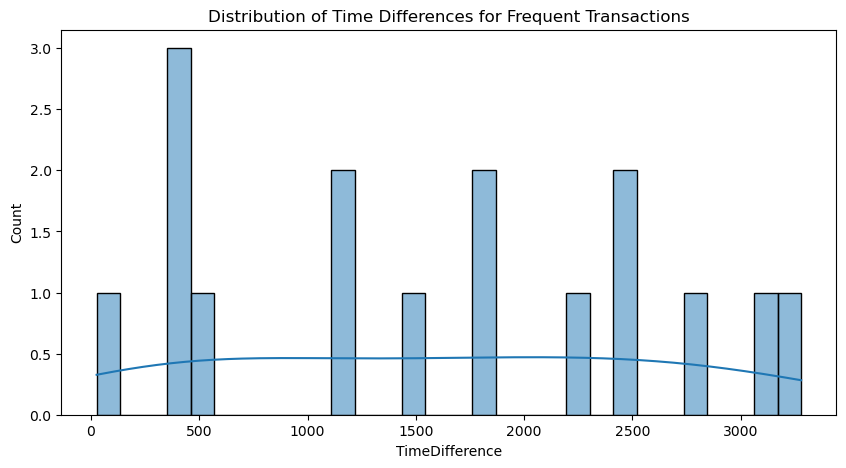

In [25]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Identify frequent transactions with short intervals
short_interval_threshold = 3600  # 1 hour in seconds
frequent_transactions = df_sorted[df_sorted['TimeDifference'] <= short_interval_threshold]

print(f"Number of frequent transactions (within 1 hour): {len(frequent_transactions)}")
display(frequent_transactions.head())

# Plot the distribution of time differences for visualization
plt.figure(figsize=(10, 5))
sns.histplot(frequent_transactions['TimeDifference'], bins=30, kde=True,  palette='YlGnBu')
plt.title('Distribution of Time Differences for Frequent Transactions')

### Insights from Transaction Interval Distribution

- Many transactions occur in **short time intervals**, hinting at **automated or high-frequency activity**.
- **Regular timing patterns** suggest potential **bot behavior** or **coordinated fraud**.

### Implications:
- **Rapid, repeated transactions** should be flagged.
- **Consistent short gaps** may indicate automation.
- **Fast high-value transactions** could signal **money laundering**.

#### E. Distribution of Balance Changes in Transactions

Understanding **balance fluctuations** can help detect unusual transactions. By analyzing **balance changes**, we can identify:
- **Unusually large debits or credits** that might be fraudulent.
- **Sudden spikes in account balance** due to unexpected deposits.
- **Patterns in spending behavior** based on transaction types.

Number of transactions with large balance changes: 125


/tmp/ipykernel_48/3415552357.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['BalanceChange'], bins=30, kde=True, palette = "YlGnBu")


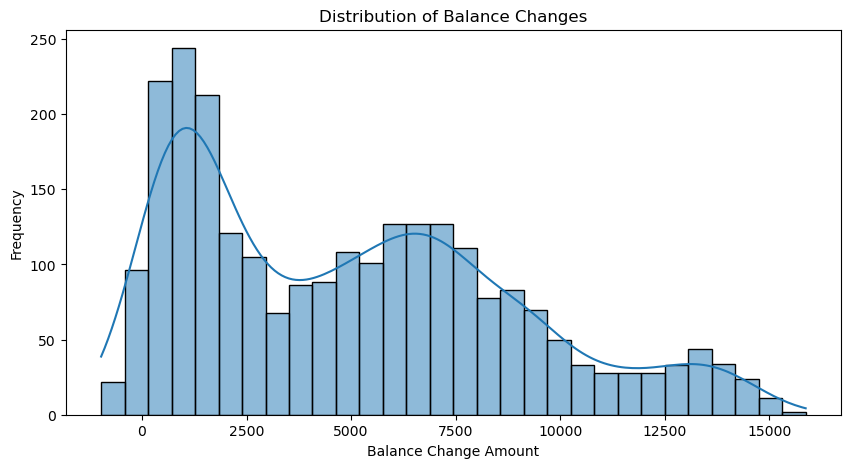

In [26]:
# Calculate change in AccountBalance for each transaction, considering TransactionType
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit' 
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# Visualize balance changes
plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True, palette = "YlGnBu")
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.ylabel('Frequency') 
plt.show()

##### Insights from Balance Change Distribution

- Most transactions have **moderate balance changes**; a few show **extreme values**.
- **125 transactions crossed the anomaly threshold**, suggesting potential fraud.
- **Doctors** show higher balance shifts — possibly due to **high income or spending**.

##### Implications:
- **Large credits** may hint at **money laundering**.
- **Frequent high-value debits** can indicate **fraudulent withdrawals**.
- **Tracking repeated anomalies** per account strengthens fraud detection.

#### F. Distribution of Transaction Channels for Large Balance Changes

Understanding which **transaction channels** (ATM, Branch, Online) are associated with **large balance changes** helps in:
- Identifying **high-risk channels** for fraud.
- Detecting **anomalies in financial transactions**.
- Enhancing **fraud monitoring and security measures**.

/tmp/ipykernel_48/3075138177.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=large_balance_changes, ax=axes[0], palette = "YlGnBu")


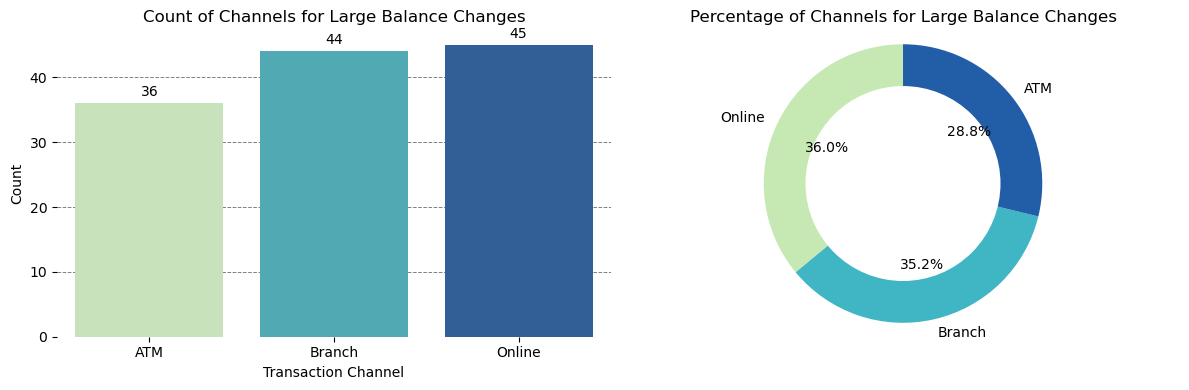

In [27]:
# Group by Channel and count occurrences
channel_counts = large_balance_changes['Channel'].value_counts()
# print("Channel Distribution for Large Balance Changes:\n", channel_counts)

# Calculate percentages
channel_percentages = large_balance_changes['Channel'].value_counts(normalize=True) * 100
# print("\nChannel Percentages for Large Balance Changes:\n", channel_percentages)

custom_palette = sns.color_palette("YlGnBu", len(channel_counts.index))  
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Channel', data=large_balance_changes, ax=axes[0], palette = "YlGnBu")
axes[0].set_title('Count of Channels for Large Balance Changes')
axes[0].set_xlabel('Transaction Channel')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=10, 
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

wedges, texts, autotexts = axes[1].pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Channels for Large Balance Changes')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

##### Insights from Channel Distribution

##### Key Findings:
- **Online:** 36% of large balance changes — highest risk for digital fraud.
- **Branch:** 35.2% — common for high-value, in-person activity.
- **ATM:** 28.8% — potential for card or PIN fraud.

##### Implications:
- Online channels need **stronger authentication**.
- ATM withdrawals with large changes should be **monitored**.
- Repeated large branch transactions may suggest **manual fraud**.

Channel patterns help **identify vulnerabilities** and guide fraud prevention.

#### G. Analyzing Large Balance Changes by Time of Day

Understanding **when large balance changes occur** can help identify patterns associated with:
- **High-risk time windows** for fraudulent transactions.
- **Unusual activity outside normal banking hours**.
- **Potential automation or insider fraud** occurring at specific times.

/tmp/ipykernel_48/3118373144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_balance_changes['TransactionHour'] = large_balance_changes['TransactionDate'].dt.hour
/tmp/ipykernel_48/3118373144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_balance_changes['TransactionDayOfWeek'] = large_balance_changes['TransactionDate'].dt.day_name()


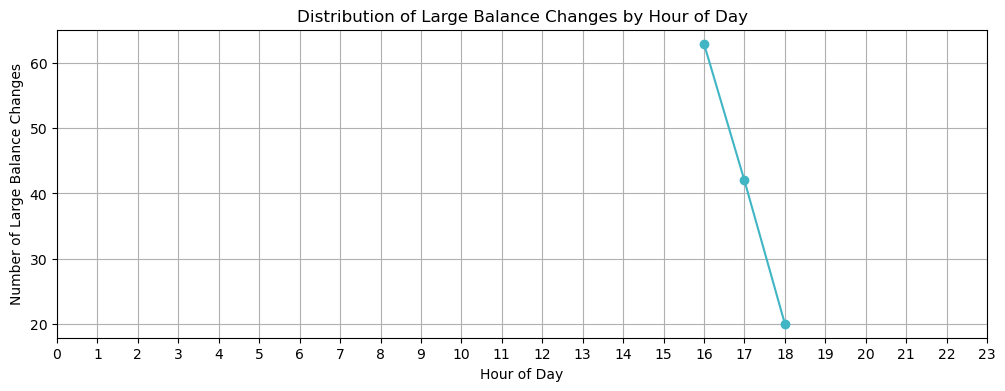

In [28]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract hour and day of week
large_balance_changes['TransactionHour'] = large_balance_changes['TransactionDate'].dt.hour
large_balance_changes['TransactionDayOfWeek'] = large_balance_changes['TransactionDate'].dt.day_name()

# Analyze by Hour
hour_counts = large_balance_changes['TransactionHour'].value_counts().sort_index()
# print("Distribution by Hour:\n", hour_counts)

plt.figure(figsize=(12, 4))  
plt.plot(hour_counts.index, hour_counts.values, color=sns.color_palette("YlGnBu", 1)[0], marker='o') 
plt.title('Distribution of Large Balance Changes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

##### Insights from Transaction Timing

##### Key Observations:
- Most large balance changes occur between **4 PM – 6 PM**.
- Activity drops sharply after **6 PM**.
- Few transactions happen **before 8 AM** or **after 7 PM**.

##### Fraud Implications:
- **4–6 PM** may be a high-risk window for fraud.
- **Unusual off-hour activity** could signal automated or unauthorized access.

##### Recommendations:
- Add stricter checks during peak hours.
- Monitor off-hour spikes for anomalies.
- Align patterns with customer behavior to improve fraud rules.

#### H. Transactions with Multiple Login Attempts

Filtering transactions with `LoginAttempts > 1` helps detect suspicious activity.

In [29]:
# Transactions with more than onelogin attempt
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

Number of transactions with more than one login attempt: 122


##### Insights on Transactions with Multiple Login Attempts

##### Key Observations:
- **Debits dominate**, indicating potential unauthorized withdrawals.
- **Credits are fewer**, suggesting less risk from deposits.
- **Online channels lead**, highlighting the vulnerability of digital platforms.
- **ATM and Branch** channels are less frequent but still relevant.

##### Fraud Implications:
- **Multiple logins + debit = high fraud risk**, especially for online or ATM channels.
- **Online transactions after failed logins** may signal compromised accounts.
- **ATM login retries** could point to PIN guessing or card fraud.

##### Recommendations:
- Flag repeated logins followed by large debits.
- Enforce stronger authentication after failed login attempts.
- Investigate ATM transactions with multiple login attempts.

#### I. High Login Attempts and Fraud Risk Analysis

Multiple login attempts before a transaction may indicate potential fraud or unauthorized access attempts. This analysis focuses on:
- **Transaction Type (Credit vs. Debit)**: Are fraud-prone transactions mostly withdrawals or deposits?
- **Transaction Channel (Online, ATM, Branch)**: Which channel is most affected by repeated login attempts?

/tmp/ipykernel_48/1676714151.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_login_attempts, x='TransactionType', palette=sns.color_palette("YlGnBu", 2))
/tmp/ipykernel_48/1676714151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_login_attempts, x='Channel', palette=sns.color_palette("YlGnBu", len(high_login_attempts['Channel'].unique())))


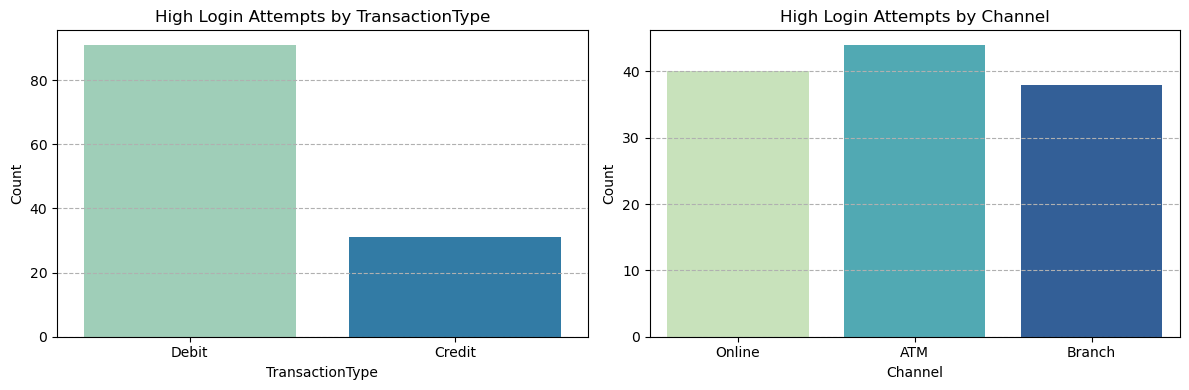

In [30]:
# Analyzing high login attempts with respect to TransactionType and Channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=high_login_attempts, x='TransactionType', palette=sns.color_palette("YlGnBu", 2)) 
plt.title('High Login Attempts by TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--') 

plt.subplot(1, 2, 2)
sns.countplot(data=high_login_attempts, x='Channel', palette=sns.color_palette("YlGnBu", len(high_login_attempts['Channel'].unique()))) 
plt.title('High Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--') 

plt.tight_layout()
plt.show()

##### Insights on High Login Attempt Transactions

- **Debit transactions** dominate, suggesting potential unauthorized withdrawals.
- **Credit transactions** are fewer, indicating less risk from deposits.

- **ATM channels** show the most high-login activity, likely linked to card fraud.
- **Online channels** follow, common in digital fraud scenarios.
- **Branch transactions** are minimal, supported by physical security.

**Recommendations:**
- Add stricter checks after multiple failed logins, especially online.
- Monitor and alert on repeated login attempts at ATMs.
- Incorporate login attempts as a fraud signal in detection models.

#### J. Transactions During Unusual Hours

Transactions occurring outside of **normal business hours (9 AM - 6 PM)** may indicate **fraudulent activities** or **unusual customer behavior**.  

In [31]:
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

Number of transactions during unusual hours: 377


##### Transactions Outside Business Hours  

##### Key Findings:  
- **Total Transactions**: **377** (Mostly **Debit, Online**)  
- **Peak Hours**: **6-9 PM, 12-6 AM**  
- **Rare Branch Transactions**: Any occurrence may be suspicious.  

##### Fraud Risk:  
- **High-value transactions at night** → Potential fraud risk.  
- **Frequent online activity** → Possible bot use or compromised accounts.  

##### Actions:  
- **Flag high-value transactions at odd hours**.  
- **Enforce multi-factor authentication for online transactions**.  
- **Monitor login attempts + unusual hours** for anomalies.  

This helps **detect fraud faster** and **reduce unauthorized access**.

#### K. Transaction Types During Unusual Hours

Analyzing the distribution of **credit vs. debit transactions** outside normal hours can help detect fraudulent activities.  

- **Debit transactions dominate** (78.8%), suggesting frequent cash withdrawals or account takeovers.
- **Credit transactions (21.2%)** are lower but still relevant for fraud risk.

/tmp/ipykernel_48/3511482833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette="YlGnBu", ax=axes[0])


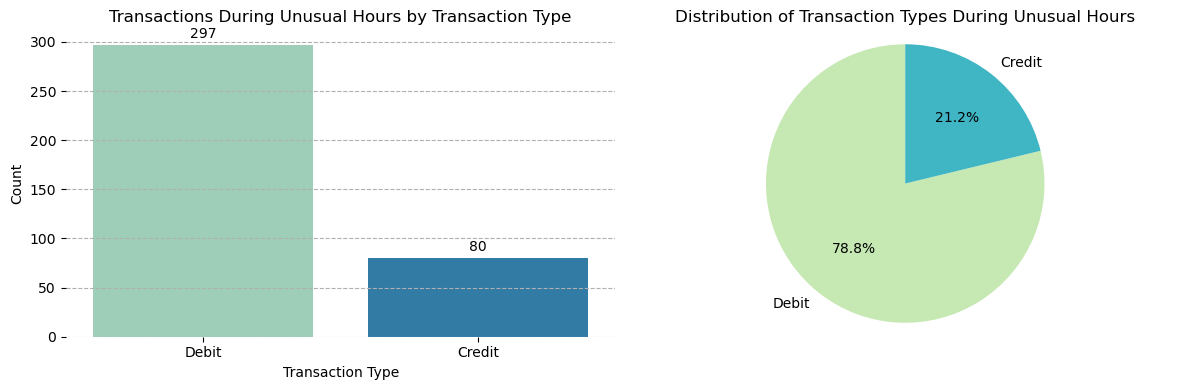

In [32]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette="YlGnBu", ax=axes[0])
axes[0].set_title('Transactions During Unusual Hours by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5), textcoords='offset points')
sns.despine(left=True, bottom=True)

transaction_counts = unusual_hour_transactions['TransactionType'].value_counts()
axes[1].pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
axes[1].set_title('Distribution of Transaction Types During Unusual Hours')
axes[1].axis('equal')  

plt.tight_layout() 
plt.show()

##### Key Insights

- **Most transactions outside business hours are debit-based**, which may indicate unauthorized access or ATM withdrawals.
- **Credit transactions are fewer**, but monitoring high-value ones is crucial.
- **Recommended Actions**:
  - Implement **real-time fraud alerts** for unusual debit transactions.
  - Strengthen **authentication** for late-night credit transactions.

In [33]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP_Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'BalanceChange', 'TransactionHour'],
      dtype='object')

##### Correlation Analysis of Numerical Features

Understanding correlations between numerical features helps in detecting dependencies and refining fraud detection models.

- **CustomerAge and AccountBalance (0.32)** show a weak positive correlation, meaning older customers may have slightly higher balances.
- Other features show **little to no correlation**, indicating they are largely independent.

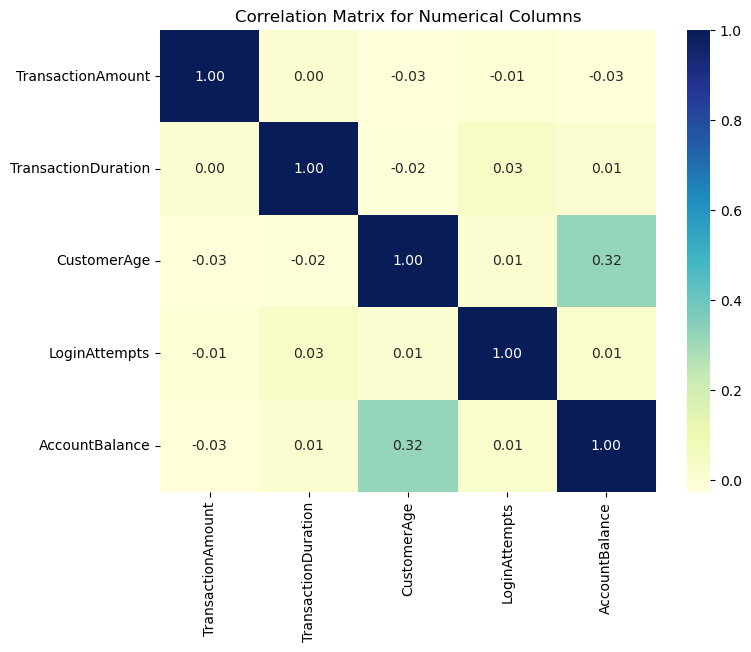

In [34]:
# Defining the YlGnBu colormap
cmap = "YlGnBu"
# Displaying correlation matrix for numerical columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

##### Key Insights

- **No strong correlations observed**, suggesting that numerical features independently contribute to fraud detection.
- **Low correlation between LoginAttempts and other features**, meaning multiple login attempts might not directly relate to transaction amounts or account balance.
- **Recommended Actions**:
  - Consider **feature engineering** to extract more meaningful interactions.
  - Focus on **categorical features or behavioral patterns** for fraud detection.
